In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

In [2]:
# file directory
train_directory = 'D:/Data science/project/FER-2013/train'
test_directory = 'D:/Data science/project/FER-2013/test'

In [3]:
# initializing image data generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_gen = ImageDataGenerator()
test_data_gen = ImageDataGenerator()

In [5]:
# importing training and testing data from directory
train_set = train_data_gen.flow_from_directory(
    directory = train_directory,
    target_size = (48,48),
    batch_size = 128,
    color_mode = 'grayscale',
    class_mode = 'categorical'
)

test_set = test_data_gen.flow_from_directory(
    directory = test_directory,
    target_size = (48,48),
    batch_size = 128,
    color_mode = 'grayscale',
    class_mode = 'categorical'
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


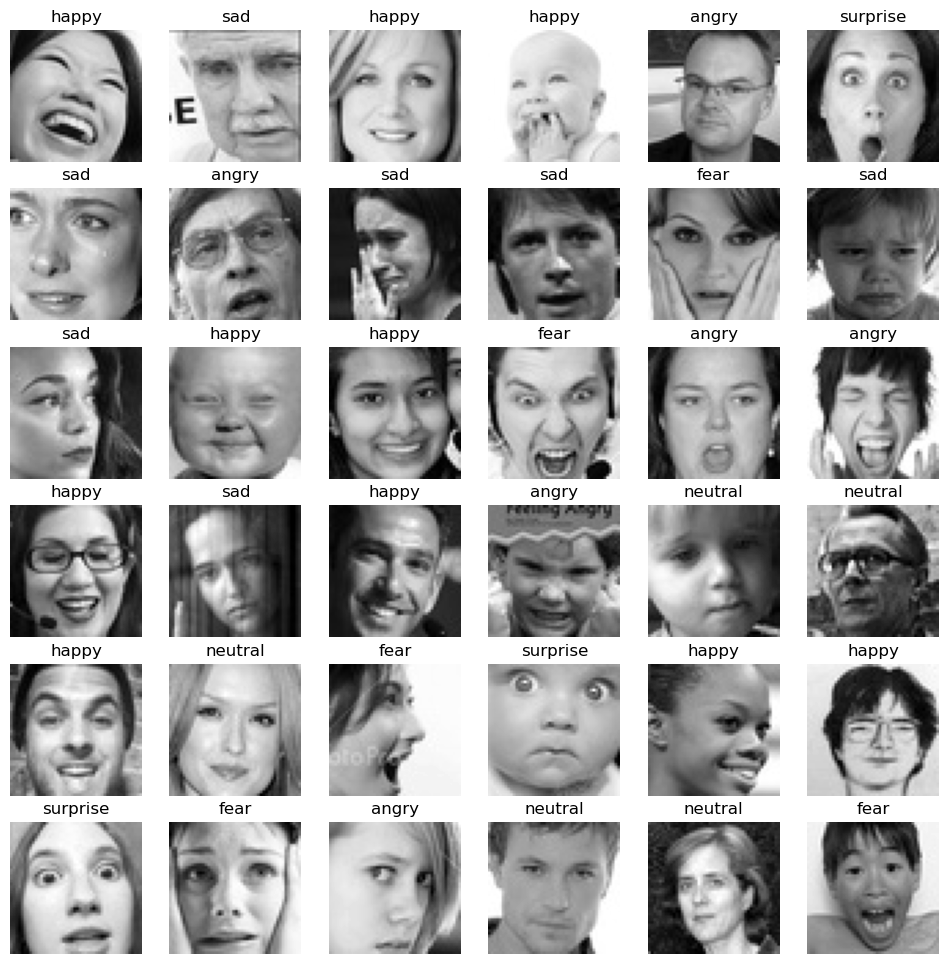

In [15]:
# viewing the sample of images and its label in data
batch = next(train_set)

fig, axes = plt.subplots(6,6, figsize = (12,12))

for i, ax in enumerate(axes.flat):
    ax.imshow(batch[0][i], cmap = 'gray')
    label_idx = batch[1][i].argmax()
    label_map = {k:j for j,k in train_set.class_indices.items()}
    ax.set_title(label_map[label_idx])
    ax.axis('off')
    
plt.show()

In [36]:
# importing required functions to build CNN model
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.models import Sequential

# building CNN model
model = Sequential()

# adding feature extraction layer 1
model.add(Conv2D(128, kernel_size=(3,3), padding='same', input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# adding feature extraction layer 2
model.add(Conv2D(256, kernel_size=(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# adding feature extraction layer 3
model.add(Conv2D(512, kernel_size=(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# flattening the output from feature extraction layer
model.add(Flatten())

# adding dense layer 1
model.add(Dense(256))
model.add(Activation('relu'))

# adding dense layer 2
model.add(Dense(512))
model.add(Activation('relu'))

# target classification layer          
model.add(Dense(7, activation='softmax'))

# compliling model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

# getting model summary
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 48, 48, 128)       1280      
                                                                 
 batch_normalization_17 (Ba  (None, 48, 48, 128)       512       
 tchNormalization)                                               
                                                                 
 activation_21 (Activation)  (None, 48, 48, 128)       0         
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 24, 24, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 24, 24, 256)       295168    
                                                                 
 batch_normalization_18 (Ba  (None, 24, 24, 256)      

In [37]:
# model saving checkpoints
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    filepath = './model.h5',
    monitor = 'val_accuracy',
    save_best_only = True,
    save_weights_only = True,
    mode = 'max',
    verbose = 1
)

In [38]:
# fitting and training model with training set and validating with test set
history = model.fit(
    train_set,
    batch_size = 64,
    epochs = 10,
    validation_data = test_set,
    callbacks = [checkpoint] 
)

Epoch 1/10
225/225 [==============================] - ETA: 0s - loss: 2.3096 - accuracy: 0.2764
Epoch 1: val_accuracy improved from -inf to 0.23823, saving model to .\model.h5
225/225 [==============================] - 715s 3s/step - loss: 2.3096 - accuracy: 0.2764 - val_loss: 1.8519 - val_accuracy: 0.2382
Epoch 2/10
225/225 [==============================] - ETA: 0s - loss: 1.5999 - accuracy: 0.3751
Epoch 2: val_accuracy improved from 0.23823 to 0.39844, saving model to .\model.h5
225/225 [==============================] - 579s 3s/step - loss: 1.5999 - accuracy: 0.3751 - val_loss: 1.6010 - val_accuracy: 0.3984
Epoch 3/10
225/225 [==============================] - ETA: 0s - loss: 1.4259 - accuracy: 0.4474
Epoch 3: val_accuracy improved from 0.39844 to 0.44386, saving model to .\model.h5
225/225 [==============================] - 570s 3s/step - loss: 1.4259 - accuracy: 0.4474 - val_loss: 1.4289 - val_accuracy: 0.4439
Epoch 4/10
225/225 [==============================] - ETA: 0s - loss: 

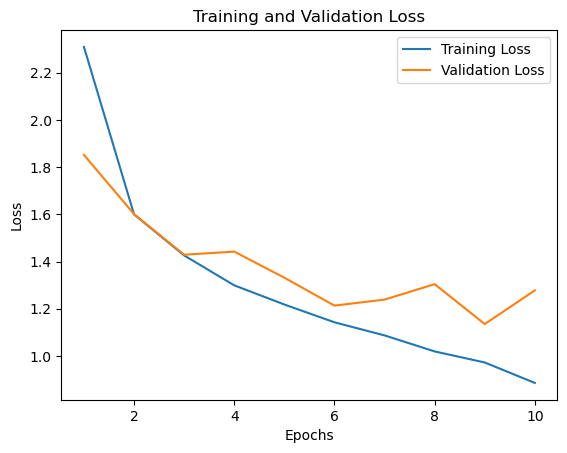

In [39]:
# difference in loss in training and validation loss in each epochs
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1,len(training_loss)+1)

plt.plot(epochs, training_loss, label = 'Training Loss')
plt.plot(epochs, validation_loss, label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

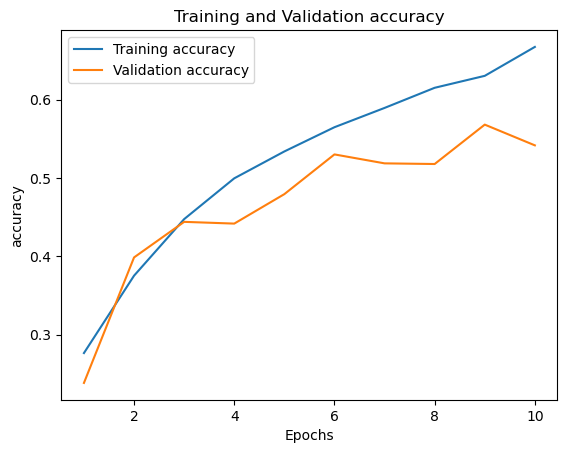

In [40]:
# difference in accuracy in training and validation loss in each epochs
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
epochs = range(1,len(training_loss)+1)

plt.plot(epochs, training_accuracy, label = 'Training accuracy')
plt.plot(epochs, validation_accuracy, label = 'Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()